In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score



In [4]:
df=pd.read_csv("calories.csv")
df

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [5]:
add_data=pd.read_csv("exercise.csv")
add_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [6]:
df=pd.merge(df,add_data,on="User_ID")
df

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [7]:
df=df.drop("User_ID",axis=1)
df

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [8]:
df.isna().sum()

Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [9]:
df.describe()

,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


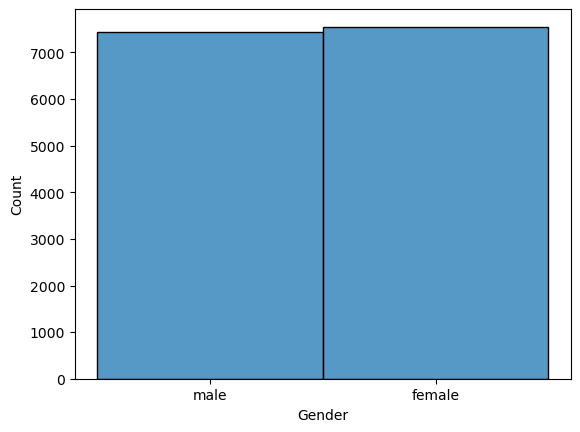

In [10]:
sns.histplot(df["Gender"])
plt.show()

c:\Users\CompuMart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


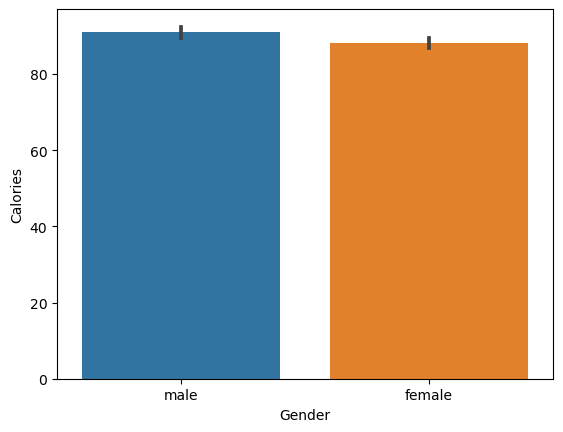

In [11]:
sns.barplot(df["Gender"],df["Calories"])
plt.show()

In [12]:
df=df.drop("Gender",axis=1)
df

,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,68,190.0,94.0,29.0,105.0,40.8
1,66.0,20,166.0,60.0,14.0,94.0,40.3
2,26.0,69,179.0,79.0,5.0,88.0,38.7
3,71.0,34,179.0,71.0,13.0,100.0,40.5
4,35.0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,45.0,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,78,193.0,97.0,2.0,84.0,38.3


<AxesSubplot:>

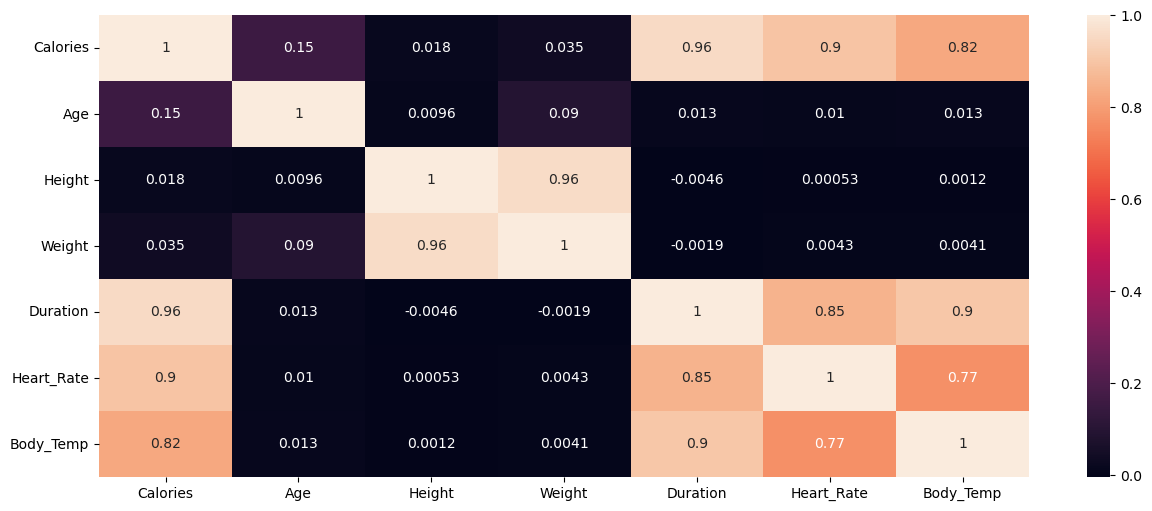

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [14]:
x=df.drop("Calories",axis=1)
y=df["Calories"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test) 

In [16]:
model=Ridge()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
r2


0.9672858625529938